In [1]:
import pandas as pd
import numpy as np
import datetime,os,sys,time
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

# Lets Acquire the Data

In [2]:
def list_files_2(startpath,form):
    gd=[os.path.join(root,f) for root,dirs,files in os.walk(startpath) for f in files if f.endswith(form)]
    return gd

In [3]:
actual_path = os.getcwd()

In [4]:
files = list_files_2(actual_path,'.dat')
files.sort()
types = np.unique([item.split('/')[-2] for item in files])
print('Files available for this study: ')
counter0,counter1,optional,protocol = [0,0,[],[]]
for item in files:
    if types[0] in item:
        counter0 += 1
        if counter0 == 1:
            print('   >> '+types[0])
        print('       ** '+item)
        if types[0] == 'Optional': optional.append(item)
        if types[0] == 'Protocol': protocol.append(item)
    if types[1] in item:
        counter1 += 1
        if counter1 == 1:
            print('   >> '+types[1])
        print('       ** '+item)
        if types[1] == 'Optional': optional.append(item)
        if types[1] == 'Protocol': protocol.append(item)

Files available for this study: 
   >> Optional
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject101.dat
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject105.dat
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject106.dat
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject108.dat
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject109.dat
   >> Protocol
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject101.dat
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject102.dat
       ** /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject1

In [5]:
IMU = ['Temp (°C)','AX','AY','AZ','AX2','AY2','AZ2','Giros1','Giros2','Giros3','MX','MY','MZ','O1','O2','O3','O4']
cols = ['Time (s)','Activity ID','Heart Rate (bpm)']+['Hand '+item for item in IMU]+['Chest '+item for item in IMU]+['Ankle '+item for item in IMU]

In [6]:
%%time
counter = 0
for item in protocol:
    print('Iteration '+str(counter)+' | File: '+item)
    data = pd.read_csv(item, sep=r'\s{1,}', engine='python', header=None)
    data.columns = cols
    data['User ID'] = int(''.join([e for e in item.split('/')[-1].split('.')[0] if e.isnumeric()]))
    if counter == 0:
        final_data = data
    else:
        final_data = pd.concat([final_data,data])
        final_data = final_data.reset_index(drop=True)
    del data
    counter += 1

Iteration 0 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject101.dat
Iteration 1 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject102.dat
Iteration 2 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject103.dat
Iteration 3 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject104.dat
Iteration 4 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject105.dat
Iteration 5 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject106.dat
Iteration 6 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Protocol/subject107.dat
Iteration 7 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/

In [7]:
%%time
counter = 0
for item in optional:
    print('Iteration '+str(counter)+' | File: '+item)
    data = pd.read_csv(item, sep=r'\s{1,}', engine='python', header=None)
    data.columns = cols
    data['User ID'] = int(''.join([e for e in item.split('/')[-1].split('.')[0] if e.isnumeric()]))
    if counter == 0:
        final_data_optional = data
    else:
        final_data_optional = pd.concat([final_data_optional,data])
        final_data_optional = final_data_optional.reset_index(drop=True)
    del data
    counter += 1

Iteration 0 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject101.dat
Iteration 1 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject105.dat
Iteration 2 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject106.dat
Iteration 3 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject108.dat
Iteration 4 | File: /home/ivan/Desktop/IRONHACK_DATA_ANALYTICS/madrid-oct-2018/final-project/my_project/Optional/subject109.dat
CPU times: user 44.8 s, sys: 3.1 s, total: 47.9 s
Wall time: 48.1 s


In [8]:
display(final_data.head())
display(final_data.describe())
display(final_data.dtypes)

,Time (s),Activity ID,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand AX2,Hand AY2,Hand AZ2,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Hand O1,Hand O2,Hand O3,Hand O4,Chest Temp (°C),Chest AX,Chest AY,Chest AZ,Chest AX2,Chest AY2,Chest AZ2,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Chest MZ,Chest O1,Chest O2,Chest O3,Chest O4,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle AX2,Ankle AY2,Ankle AZ2,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ,Ankle O1,Ankle O2,Ankle O3,Ankle O4,User ID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


,Time (s),Activity ID,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand AX2,Hand AY2,Hand AZ2,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Hand O1,Hand O2,Hand O3,Hand O4,Chest Temp (°C),Chest AX,Chest AY,Chest AZ,Chest AX2,Chest AY2,Chest AZ2,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Chest MZ,Chest O1,Chest O2,Chest O3,Chest O4,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle AX2,Ankle AY2,Ankle AZ2,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ,Ankle O1,Ankle O2,Ankle O3,Ankle O4,User ID
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,-3.704744e-03,3.213540e-02,-6.167531e-03,2.116857e+01,-1.438908e+01,-2.164451e+01,5.665828e-01,-5.637362e-02,-1.387280e-01,-3.253652e-02,3.614974e+01,3.763755e-01,8.512205e+00,-1.518129e+00,2.448624e-01,8.505998e+00,-1.183563e+00,5.538698e-03,8.371162e-03,-2.106222e-02,3.579709e+00,-3.185773e+01,5.516828e+00,5.323223e-01,-4.070343e-01,5.515427e-02,4.855860e-02,3.368513e+01,9.545448e+00,-1.232476e-01,-2.461503e+00,9.521348e+00,-2.062646e-02,-2.039830e+00,8.635143e-03,-3.450122e-02,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,1.045005e+02
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,1.297393e+00,8.870178e-01,1.452335e+00,2.402141e+01,2.409442e+01,2.061562e+01,3.053876e-01,3.780510e-01,3.355073e-01,5.538527e-01,1.585569e+00,1.620532e+00,4.234937e+00,4.173970e+00,1.619479e+00,4.206740e+00,4.188157e+00,4.020286e-01,5.389323e-01,2.924429e-01,1.645178e+01,1.611910e+01,1.992197e+01,2.894888e-01,2.945579e-01,4.763355e-01,3.848282e-01,1.184363e+00,5.711595e+00,6.839350e+00,3.556998e+00,5.346379e+00,6.382194e+00,3.191150e+00,1.073556e+00,5.966026e-01,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,-2.813540e+01,-2.221270e+01,-1.669970e+01,-1.039410e+02,-2.000430e+02,-4.976320e+02,-4.522460e-01,-9.999960e-01,-9.982610e-01,-9.993260e-01,3.093750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-3.420400e+01,-4.825720e+01,-6.180410e+01,-1.252510e+01,-8.499900e+00,-7.851890e+00,-7.624520e+01,-1.224800e+02,-6.668470e+01,-2.220890e-01,-9.994670e-01,-9.996350e-01,-8.801950e-01,2.912500e+01,-1.550680e+02,-1.576150e+02,-1.589260e+02,-6.130230e+01,-6.190640e+01,-6.232120e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685817e-01,-8.933270e+00,1.284680e+00,1.164040e+00,-3.477165e-01,-1.970403e-01,-3.011370e-01,5.254000e+00,-2.962280e+01,-3.526602e+01,3.000760e-01,-3.550642e-01,-4.132433e-01,-5.603453e-01,3.512500e+01,-4.201365e-01,7.298863e+00,-3.878680e+00,-5.343240e-01,7.285490e+00,-3.562708e+00,-9.148432e-02,-1.268000e-01,-1.126250e-01,-6.775287e+00,-4.020430e+01,-8.342240e+00,3.060410e-01,-6.405910e-01,-3.587140e-01,-2.481830e-01

Time (s)            float64
Activity ID           int64
Heart Rate (bpm)    float64
Hand Temp (°C)      float64
Hand AX             float64
Hand AY             float64
Hand AZ             float64
Hand AX2            float64
Hand AY2            float64
Hand AZ2            float64
Hand Giros1         float64
Hand Giros2         float64
Hand Giros3         float64
Hand MX             float64
Hand MY             float64
Hand MZ             float64
Hand O1             float64
Hand O2             float64
Hand O3             float64
Hand O4             float64
Chest Temp (°C)     float64
Chest AX            float64
Chest AY            float64
Chest AZ            float64
Chest AX2           float64
Chest AY2           float64
Chest AZ2           float64
Chest Giros1        float64
Chest Giros2        float64
Chest Giros3        float64
Chest MX            float64
Chest MY            float64
Chest MZ            float64
Chest O1            float64
Chest O2            float64
Chest O3            

In [9]:
display(final_data_optional.head())
display(final_data_optional.describe())
display(final_data_optional.dtypes)

,Time (s),Activity ID,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand AX2,Hand AY2,Hand AZ2,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Hand O1,Hand O2,Hand O3,Hand O4,Chest Temp (°C),Chest AX,Chest AY,Chest AZ,Chest AX2,Chest AY2,Chest AZ2,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Chest MZ,Chest O1,Chest O2,Chest O3,Chest O4,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle AX2,Ankle AY2,Ankle AZ2,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ,Ankle O1,Ankle O2,Ankle O3,Ankle O4,User ID
0,10.03,0,105.0,33.3125,1.99964,6.94837,5.08845,2.62244,7.73457,4.64028,-1.636280,1.25016,0.480475,-35.6479,-57.4870,-30.3466,1.0,0.0,0.0,0.0,35.125,0.125725,9.68795,-1.61319,-0.035115,9.71026,-1.23058,0.046940,-0.054078,-0.046505,-22.9582,-68.8387,9.07921,1.0,0.0,0.0,0.0,34.1875,9.06112,-3.60810,-2.33201,9.05153,-3.61551,-1.82901,-0.013781,0.009471,0.003633,-43.8463,-2.97306,45.0822,1.0,0.0,0.0,0.0,101
1,10.04,0,NaN,33.3125,1.80990,6.45729,5.16424,2.19725,6.93762,5.06528,-1.624550,1.27571,0.459727,-35.1192,-56.8440,-31.9659,1.0,0.0,0.0,0.0,35.125,0.167171,9.65095,-1.49616,-0.049875,9.74046,-1.21530,0.031656,-0.061012,-0.032001,-22.9544,-68.8332,8.46638,1.0,0.0,0.0,0.0,34.1875,9.06352,-3.57078,-2.25504,9.06644,-3.55505,-1.85955,-0.026320,0.070031,0.001804,-43.8385,-2.55481,46.8195,1.0,0.0,0.0,0.0,101
2,10.05,0,NaN,33.3125,1.82756,5.93151,5.78208,2.01408,6.28989,5.44441,-1.468110,1.22466,0.449260,-36.0382,-55.5731,-33.5619,1.0,0.0,0.0,0.0,35.125,0.134975,9.72767,-1.30339,-0.079777,9.74048,-1.18489,0.022367,-0.000838,-0.046452,-23.3206,-68.1527,8.70690,1.0,0.0,0.0,0.0,34.1875,9.06611,-3.49548,-2.17830,9.05161,-3.53987,-1.81412,-0.049060,-0.002170,0.012096,-43.6100,-3.00084,46.5653,1.0,0.0,0.0,0.0,101
3,10.06,0,NaN,33.3125,1.75760,5.78202,5.97397,1.83344,5.83858,5.92881,-1.242220,1.18576,0.410845,-35.8236,-54.9253,-34.1360,1.0,0.0,0.0,0.0,35.125,0.089153,9.83894,-1.57563,-0.064736,9.74045,-1.18498,0.034615,0.011305,-0.038846,-23.2744,-69.4974,8.95094,1.0,0.0,0.0,0.0,34.1875,9.03340,-3.64873,-1.98473,9.02174,-3.58520,-1.76841,-0.031388,-0.008545,0.007356,-43.5199,-1.99822,45.5850,1.0,0.0,0.0,0.0,101
4,10.07,0,NaN,33.3125,1.50670,6.20407,6.27669,1.71564,5.82465,6.27627,-0.967176,1.14368,0.407230,-35.6230,-55.3587,-35.1845,1.0,0.0,0.0,0.0,35.125,0.163939,9.72548,-1.61262,-0.035001,9.77070,-1.27575,-0.017403,0.026115,-0.045611,-23.4493,-67.7003,8.58298,1.0,0.0,0.0,0.0,34.1875,9.10294,-3.60962,-2.17721,9.05184,-3.61542,-1.75333,0.024549,0.036445,-0.004679,-43.6258,-2.43575,45.5812,1.0,0.0,0.0,0.0,101


,Time (s),Activity ID,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand AX2,Hand AY2,Hand AZ2,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Hand O1,Hand O2,Hand O3,Hand O4,Chest Temp (°C),Chest AX,Chest AY,Chest AZ,Chest AX2,Chest AY2,Chest AZ2,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Chest MZ,Chest O1,Chest O2,Chest O3,Chest O4,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle AX2,Ankle AY2,Ankle AZ2,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ,Ankle O1,Ankle O2,Ankle O3,Ankle O4,User ID
count,977972.000000,977972.000000,89285.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,976775.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,977225.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,976165.000000,9.761650e+05,976165.000000,976165.000000,976165.000000,977972.000000
mean,1095.265893,10.986561,92.841653,32.981623,-1.592450,3.959952,4.431161,-1.493777,3.957342,4.626484,-0.003070,0.023448,-0.008385,10.635239,-23.240876,-28.039218,0.717148,-0.054189,0.014123,-0.097062,35.237802,0.429532,8.331658,-1.579822,0.277189,8.332941,-1.279034,0.001922,-0.003307,-0.017279,-1.907348,-34.278747,6.685319,0.585004,-0.279481,0.032171,0.018804,33.529076,8.507097,-0.480251,-2.992259,8.466473,-0.401240,-2.557248,0.004231,0.000853,0.006854,-29.422440,1.855428,18.389191,5.235995e-01,-0.134946,0.189227,-0.109811,105.171456
std,758.859423,6.784942,23.775826,2.202546,5.634373,5.510360,4.444061,5.659406,5.526642,4.458228,1.183519,0.878987,1.002570,23.400857,25.499660,27.998445,0.297075,0.269633,0.258292,0.495451,1.818399,1.444233,2.846422,4.510654,1.441859,2.845708,4.524147,0.336540,0.513652,0.283124,15.041920,18.176415,21.847407,0.330780,0.273022,0.466440,0.420417,1.797642,4.476762,5.148551,3.361014,4.078231,4.629119,3.012781,0.829832,0.419463,0.989839,21.657023,22.259287,21.909746,3.703967e-01,0.510324,0.304060,0.411936,3.186500
min,5.660000,0.000000,60.000000,24.500000,-154.609000,-107.312000,-118.846000,-61.431600,-61.876400,-61.589800,-27.806300,-15.556000,-13.535500,-133.747000,-127.531000,-152.719000,-0.155123,-0.962337,-0.977987,-0.999676,29.375000,-47.099500,-31.874200,-77.422400,-46.377200,-28.873400,-61.278700,-14.908900,-9.581760,-5.087060,-58.711300,-77.438000,-75.403100,-0.220990,-0.987282,-0.994545,-0.880210,28.625000,-153.674000,-157.219000,-159.585000,-61.239900,-61.916400,-62.470500,-29.077500,-14.228900,-16.474200,-137.139000,-140.460000,-152.323000,9.350400e-07,-0.938391,-0.974629,-0.974282,101.000000
25%,495.700000,9.000000,78.000000,32.125000,-5.005785,1.294910,1.670040,-4.891810,1.287875,1.913920,-0.138211,-0.060658,-0.075462,-3.232230,-44.494700,-39.348300,0.521364,-0.189344,-0.027307,-0.551546,34.000000,-0.065413,7.667060,-4.646490,-0.193389,7.767140,-4.408150,-0.046826,-0.047494,-0.051105,-11.247100,-42.460800,-8.553390,0.351123,-0.421883,-0.300270,-0.355504,32.187500,8.528650,-2.249620,-3.842530,8.444890,-2.164460,-3.476470,-0.030074,-0.031741,-0.022725,-43.569000,-14.843800,3.998890,2.146980e-01,-0.690649,0.000000,-0.517642,101.000000
50%,984.690000,10.000000,87.000000,33.375000,-0.479119,4.042530,4.361690,-0.338833,4.051810,4.609770,-0.005387,0.003070,-0.005061,8.483660,-26.879000,-33.221600,0.790547,0.000000,0.000000,0.000000,35.625000,0.419793,9.097420,-1.700230,0.265114,9.028860,-1.321570,0.000583,0.001007,-0.015790,-2.590490,-36.381700,1.847060,0.541887,-0.306164,0.000000,0.000000,33.625000,9.447910,-0.091808,-2.479770,9.443690,-0.013995,-2.069580,0.006090,-0.002676,0.002866,-30.91

Time (s)            float64
Activity ID           int64
Heart Rate (bpm)    float64
Hand Temp (°C)      float64
Hand AX             float64
Hand AY             float64
Hand AZ             float64
Hand AX2            float64
Hand AY2            float64
Hand AZ2            float64
Hand Giros1         float64
Hand Giros2         float64
Hand Giros3         float64
Hand MX             float64
Hand MY             float64
Hand MZ             float64
Hand O1             float64
Hand O2             float64
Hand O3             float64
Hand O4             float64
Chest Temp (°C)     float64
Chest AX            float64
Chest AY            float64
Chest AZ            float64
Chest AX2           float64
Chest AY2           float64
Chest AZ2           float64
Chest Giros1        float64
Chest Giros2        float64
Chest Giros3        float64
Chest MX            float64
Chest MY            float64
Chest MZ            float64
Chest O1            float64
Chest O2            float64
Chest O3            

# First Step > DELETE O1, O2, O3 and O4 Attributes

In [10]:
final_cols = [e for e in final_data.columns.tolist() if not 'O' in e]
df = final_data[final_cols]
del final_data

final_cols_op = [e for e in final_data_optional.columns.tolist() if not 'O' in e]
df_op = final_data_optional[final_cols_op]
del final_data_optional

___

# DATA EXPLORATION

# Data Distribution

### PROTOCOL DATAFRAME

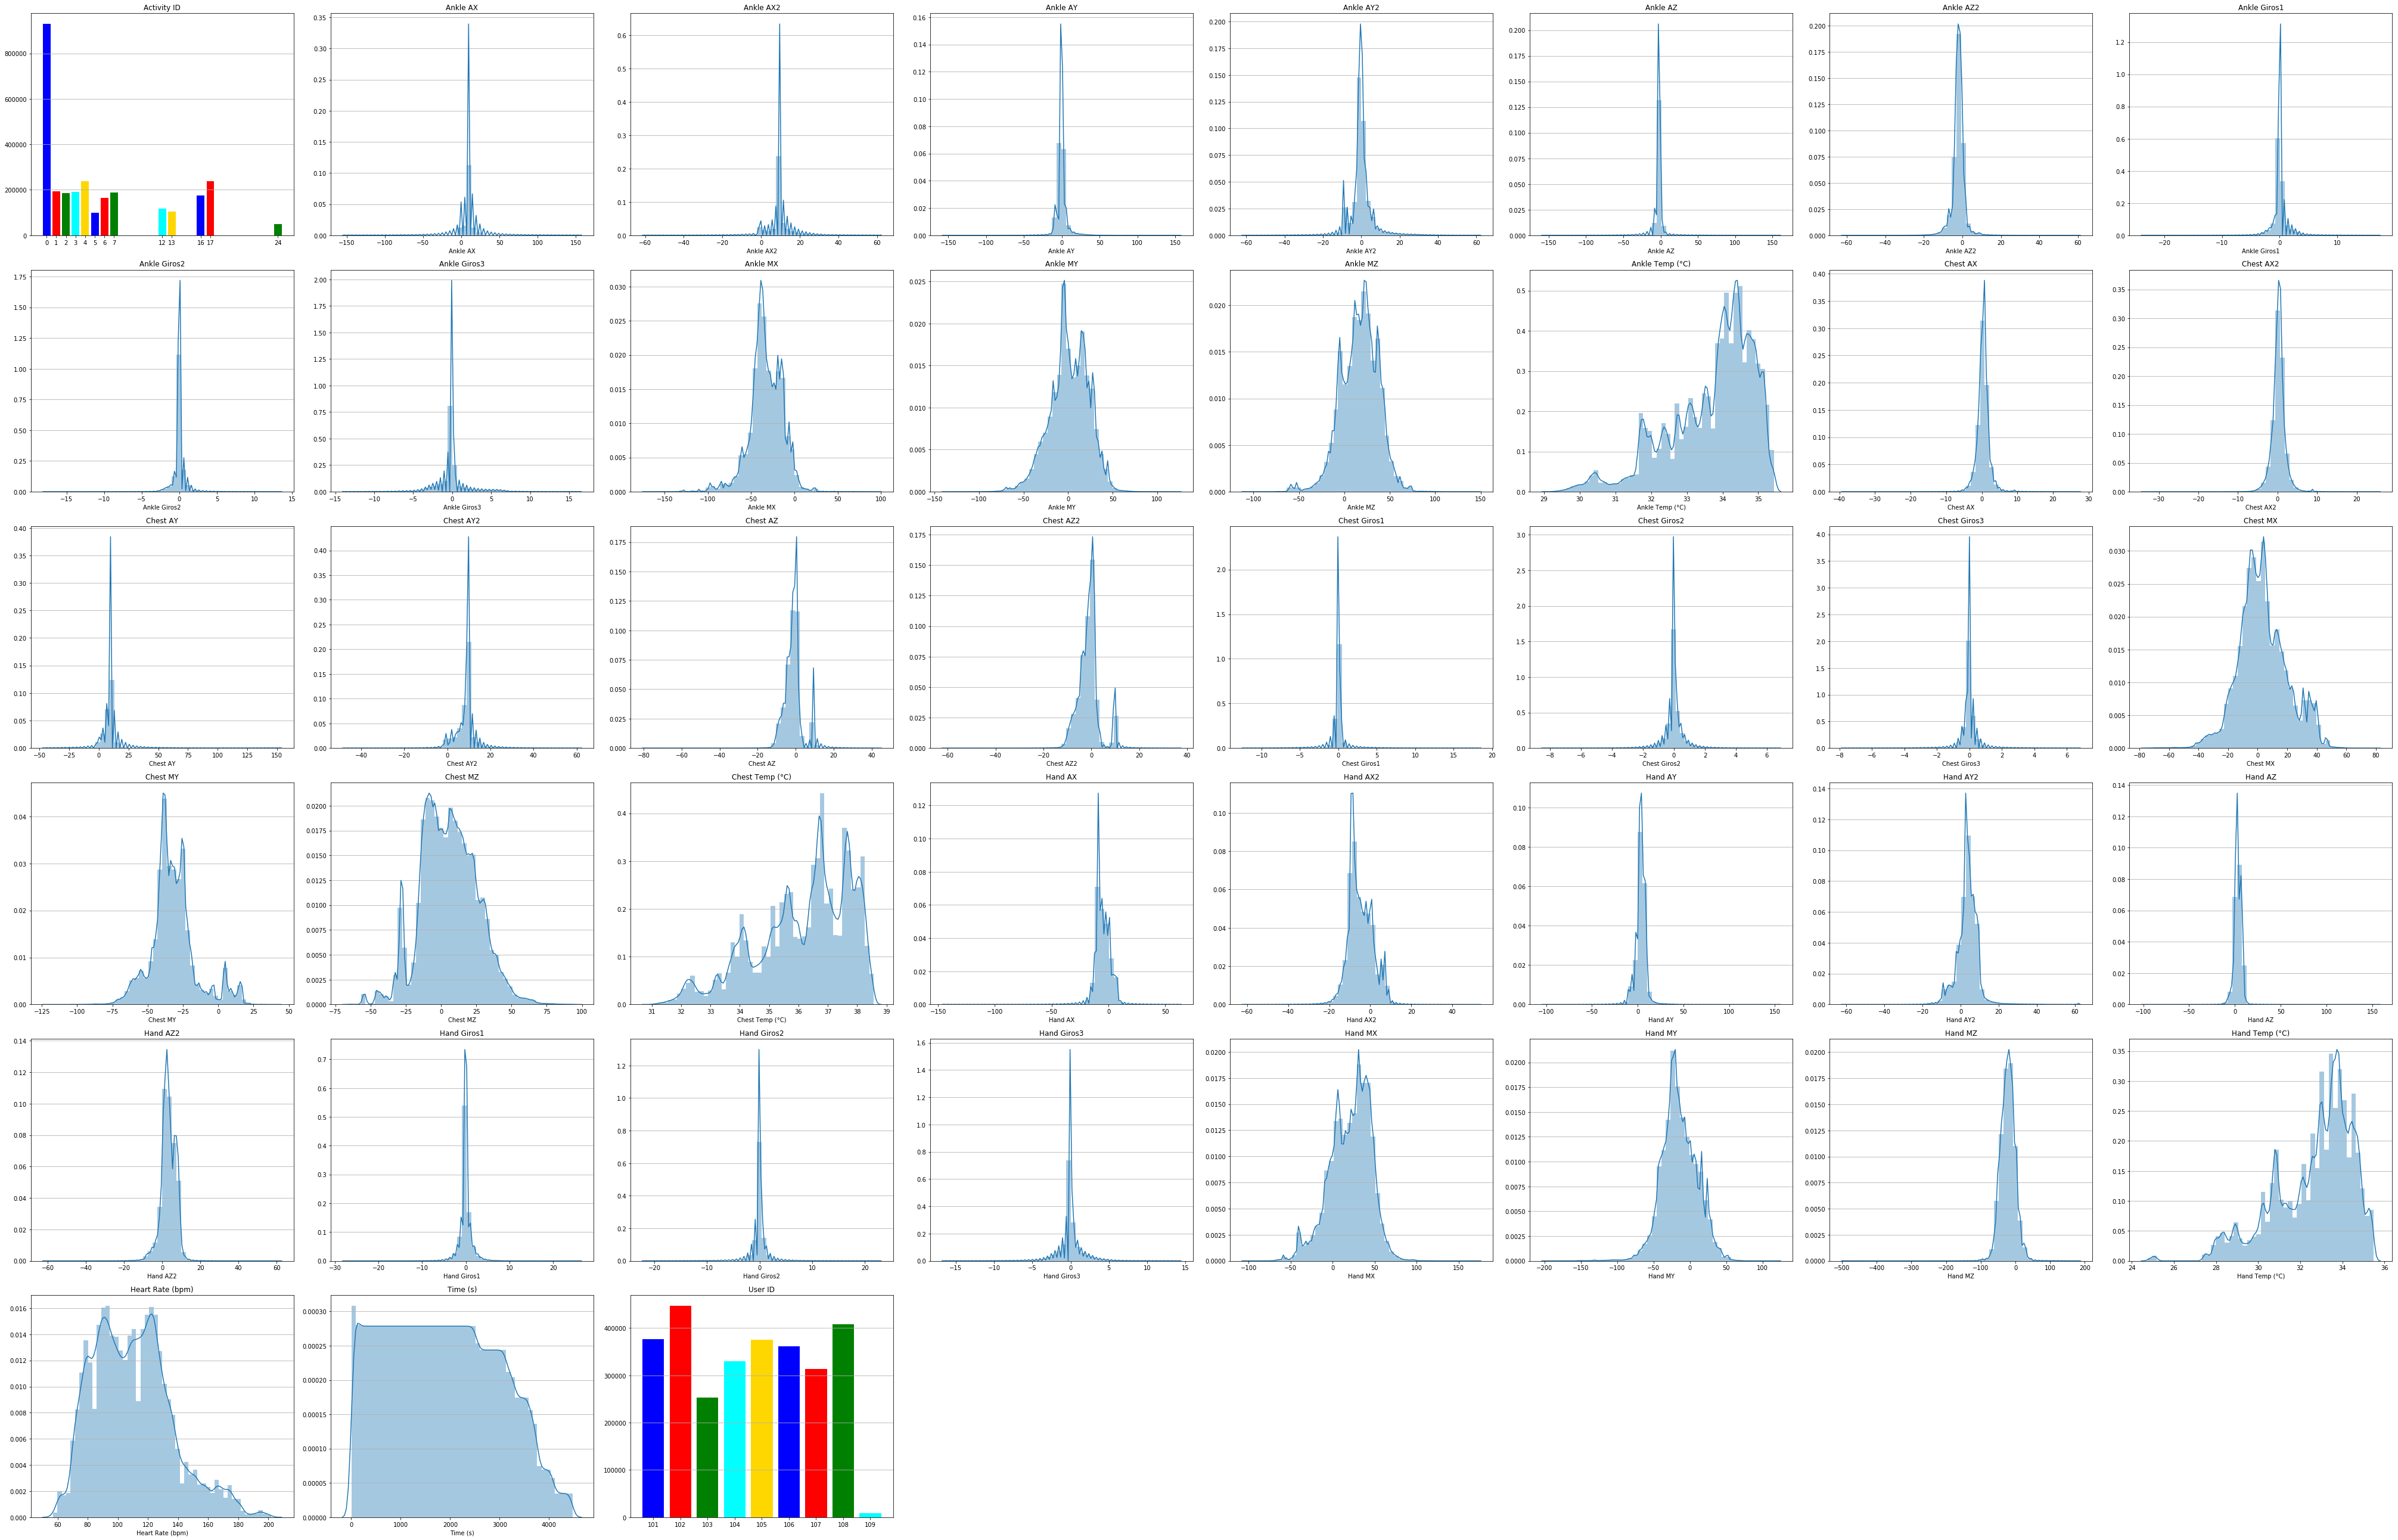

In [11]:
colors = ['blue','red','green','cyan','gold']
final_cols.sort()

n_cols = 8
n_rows = int(np.ceil(len(final_cols)/n_cols))

fig = plt.figure(figsize=(7*n_cols,6*n_rows))

counter = 0

for item in final_cols:
    
    counter += 1
    
    if df[item].dtypes == float:
        
        ax = plt.subplot(n_rows,n_cols,counter)
        sns.distplot(df[item],bins=50)
        ax.set_title(item)
        ax.yaxis.grid()      
    
    elif df[item].dtypes == int:
        
        ax = plt.subplot(n_rows,n_cols,counter)
        n,c = np.unique(df[item],return_counts=True)
        k = ax.bar(n,c)
        counter1 = -1
        for el in k:
            counter1 += 1
            if counter1>len(colors)-1:
                counter1 = 0
            el.set_facecolor(colors[counter1])
        ax.set_xticks(n)
        ax.set_title(item)
        ax.yaxis.grid()
fig.tight_layout()
plt.savefig('Figures/01_1-Protocol_DF_Distribution.png',dpi=100,bbox_inches='tight')
plt.show()

### OPTIONAL DATAFRAME

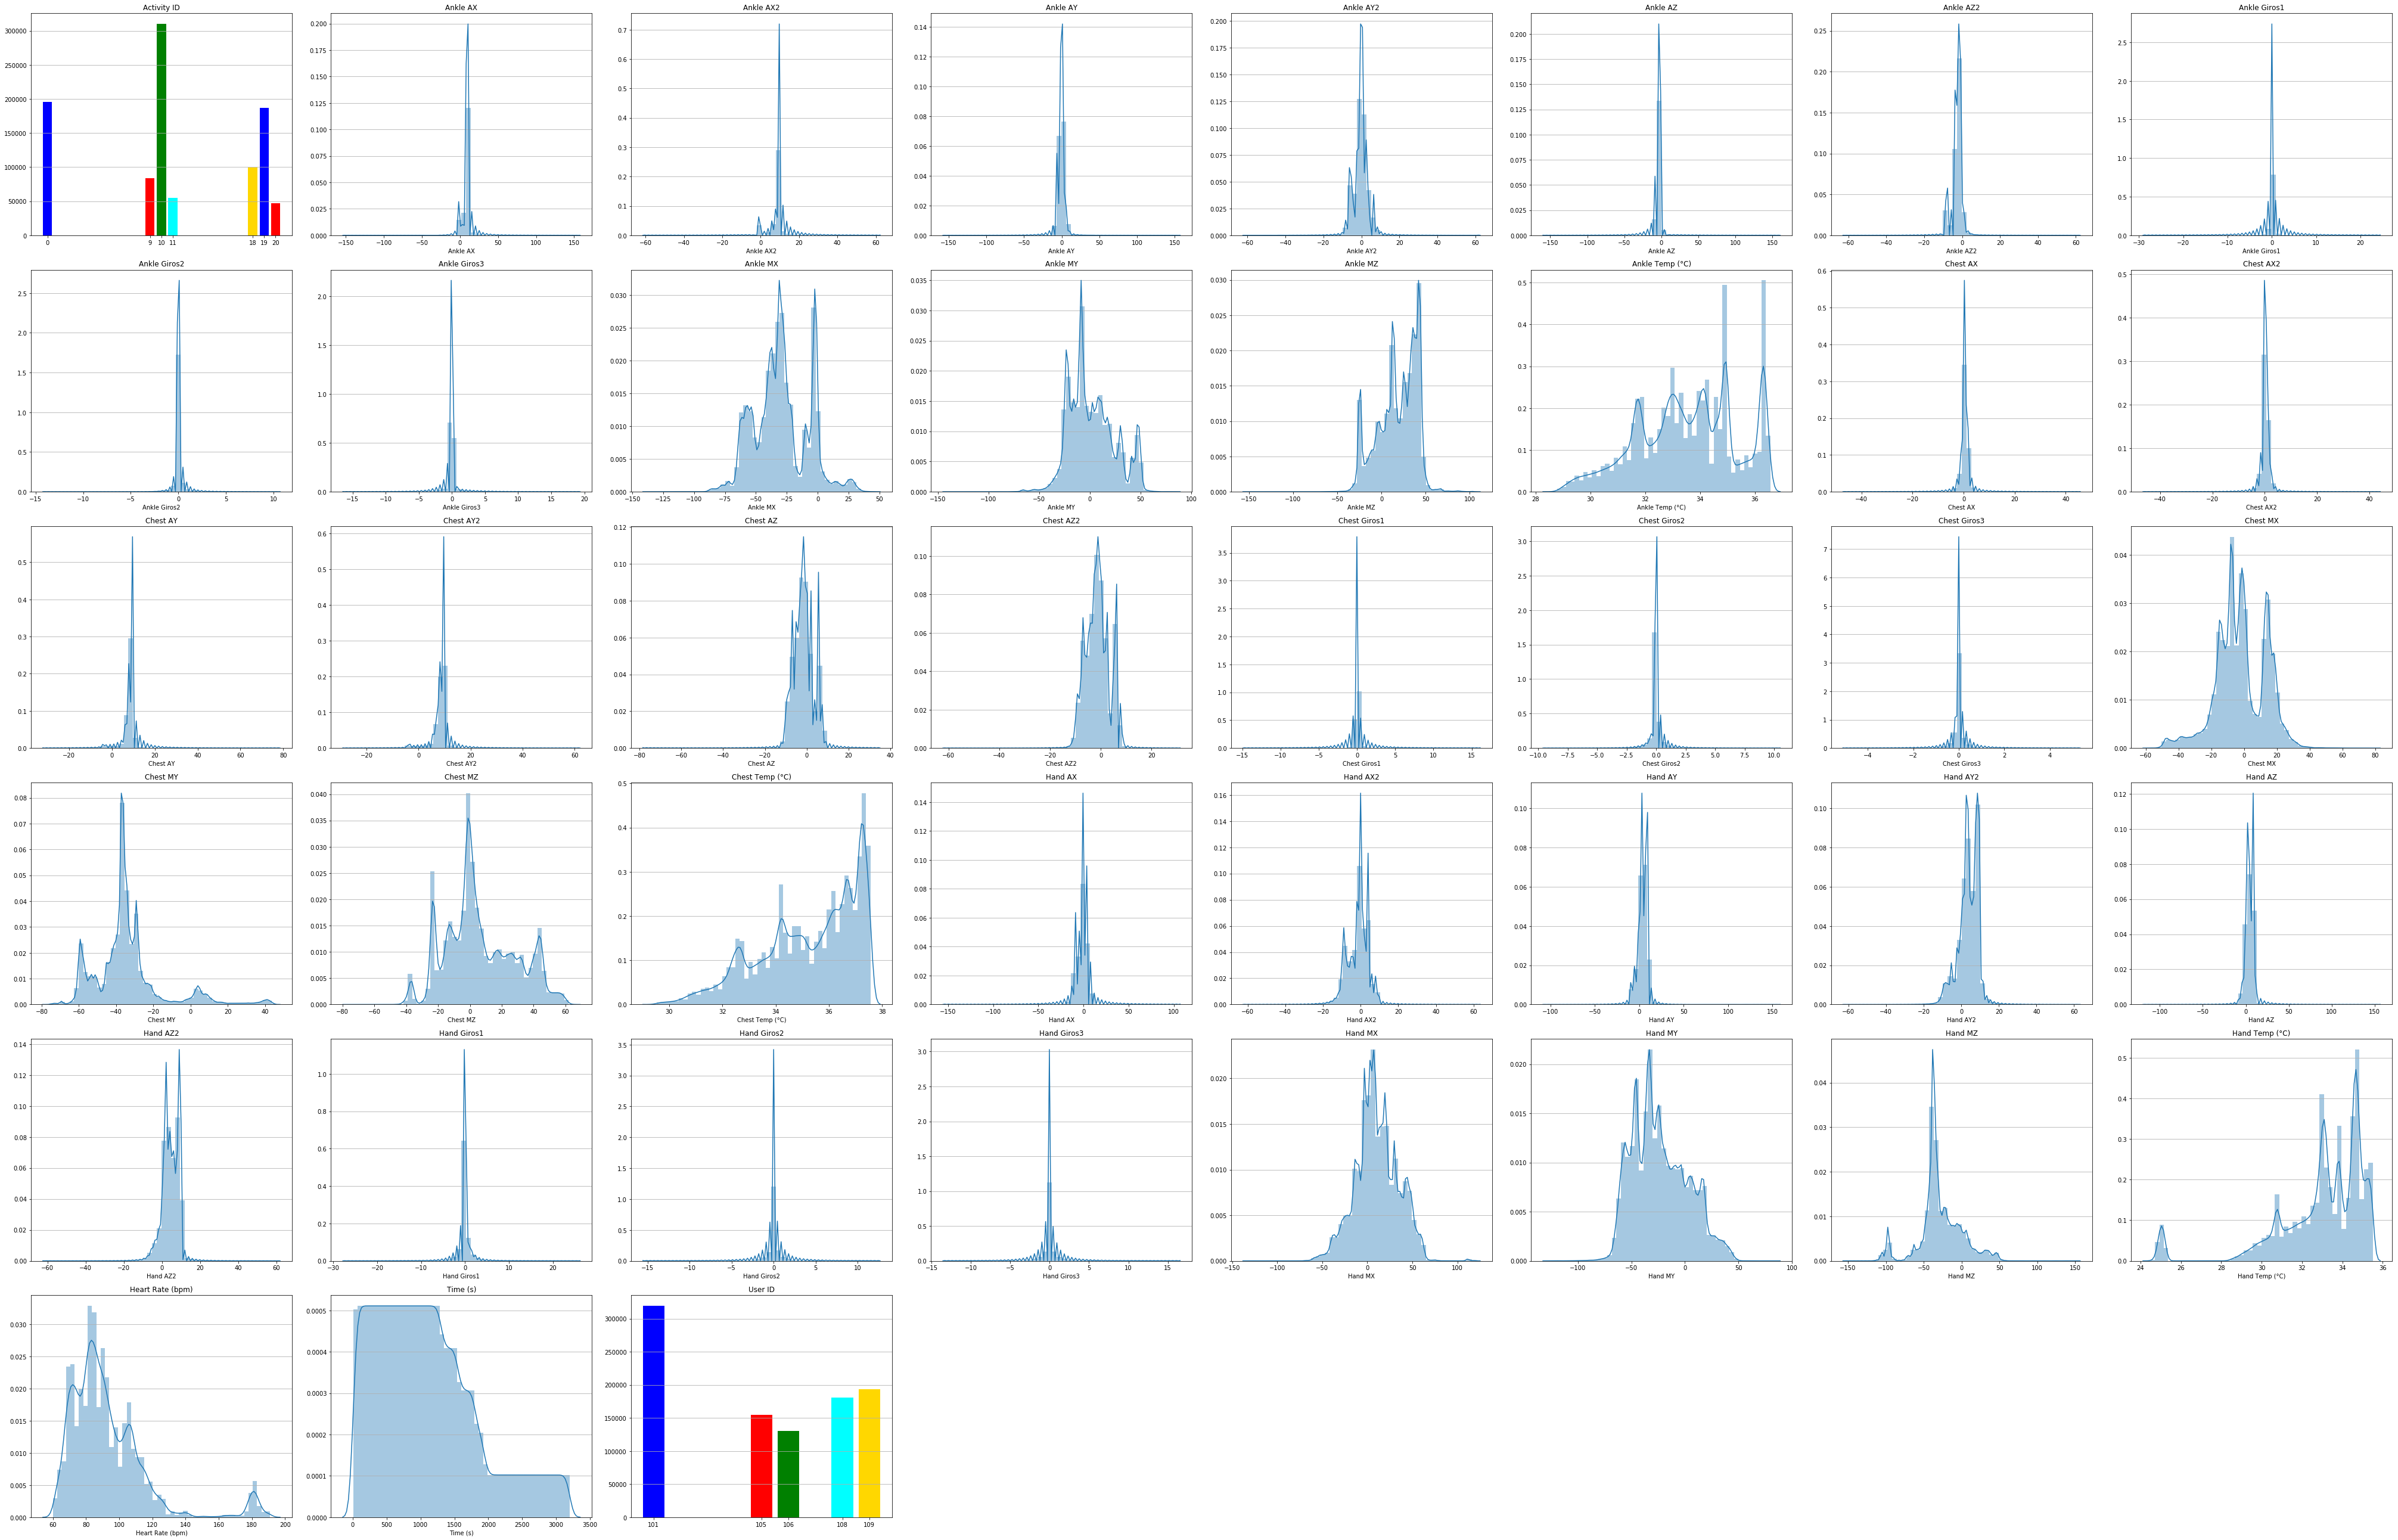

In [12]:
colors = ['blue','red','green','cyan','gold']
final_cols_op.sort()

n_cols = 8
n_rows = int(np.ceil(len(final_cols)/n_cols))

fig = plt.figure(figsize=(7*n_cols,6*n_rows))

counter = 0

for item in final_cols_op:
    
    counter += 1
    
    if df[item].dtypes == float:
        
        ax = plt.subplot(n_rows,n_cols,counter)
        sns.distplot(df_op[item],bins=50)
        ax.set_title(item)
        ax.yaxis.grid()      
    
    elif df[item].dtypes == int:
        
        ax = plt.subplot(n_rows,n_cols,counter)
        n,c = np.unique(df_op[item],return_counts=True)
        k = ax.bar(n,c)
        counter1 = -1
        for el in k:
            counter1 += 1
            if counter1>len(colors)-1:
                counter1 = 0
            el.set_facecolor(colors[counter1])
        ax.set_xticks(n)
        ax.set_title(item)
        ax.yaxis.grid()
fig.tight_layout()
plt.savefig('Figures/01_2-Optional_DF_Distribution.png',dpi=100,bbox_inches='tight')
plt.show()

# Lets check the missing data by USER ID in % For Protocol Files

In [13]:
counter = 0
missing = []
for item in df['User ID'].unique():
    a = df[df['User ID'] == item]
    print('User ID: ',item)
    b = a.isna().sum()
    if counter == 0:
        ind = b.index.tolist()
    missing.append(np.round(b.values*100/len(a),2))

User ID:  101
User ID:  102
User ID:  103
User ID:  104
User ID:  105
User ID:  106
User ID:  107
User ID:  108
User ID:  109


In [14]:
missing_df_user = pd.DataFrame(np.asarray(missing).T,columns=df['User ID'].unique(),index=ind)
display(missing_df_user)

,101,102,103,104,105,106,107,108,109
Time (s),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Activity ID,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Heart Rate (bpm),90.86,90.87,90.87,90.86,90.87,90.87,90.87,90.89,90.85
Hand Temp (°C),0.39,0.61,0.21,0.67,0.41,0.28,0.48,0.53,0.04
Hand AX,0.39,0.61,0.21,0.67,0.41,0.28,0.48,0.53,0.04
Hand AY,0.39,0.61,0.21,0.67,0.41,0.28,0.48,0.53,0.04
Hand AZ,0.39,0.61,0.21,0.67,0.41,0.28,0.48,0.53,0.04
Hand AX2,0.39,0.61,0.21,0.67,0.41,0.28,0.48,0.53,0.04
Hand AY2,0.39,0.61,0.21,0.67,0.41,0.28,0.48,0.53,0.04
Hand AZ2,0.39,0.61,0.21,0.67,0.41,0.28,0.48,0.53,0.04


# Lets check the missing values by Activity ID For Protocol Files

In [15]:
counter = 0
missing = []
act_list = df['Activity ID'].unique()
act_list.sort()
for item in act_list:
    a = df[df['Activity ID'] == item]
    print('Activity ID: ',item)
    b = a.isna().sum()
    if counter == 0:
        ind = b.index.tolist()
    missing.append(np.round(b.values*100/len(a),2))

Activity ID:  0
Activity ID:  1
Activity ID:  2
Activity ID:  3
Activity ID:  4
Activity ID:  5
Activity ID:  6
Activity ID:  7
Activity ID:  12
Activity ID:  13
Activity ID:  16
Activity ID:  17
Activity ID:  24


In [16]:
missing_df_act = pd.DataFrame(np.asarray(missing).T,columns=act_list,index=ind)
display(missing_df_act)

,0,1,2,3,4,5,6,7,12,13,16,17,24
Time (s),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Activity ID,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Heart Rate (bpm),90.87,90.86,90.86,90.87,90.88,90.95,90.86,90.86,90.86,90.86,90.86,90.88,90.85
Hand Temp (°C),0.22,0.01,0.09,0.08,2.64,1.56,0.04,1.06,0.03,0.02,0.04,0.10,1.07
Hand AX,0.22,0.01,0.09,0.08,2.64,1.56,0.04,1.06,0.03,0.02,0.04,0.10,1.07
Hand AY,0.22,0.01,0.09,0.08,2.64,1.56,0.04,1.06,0.03,0.02,0.04,0.10,1.07
Hand AZ,0.22,0.01,0.09,0.08,2.64,1.56,0.04,1.06,0.03,0.02,0.04,0.10,1.07
Hand AX2,0.22,0.01,0.09,0.08,2.64,1.56,0.04,1.06,0.03,0.02,0.04,0.10,1.07
Hand AY2,0.22,0.01,0.09,0.08,2.64,1.56,0.04,1.06,0.03,0.02,0.04,0.10,1.07
Hand AZ2,0.22,0.01,0.09,0.08,2.64,1.56,0.04,1.06,0.03,0.02,0.04,0.10,1.07


# NOW FOR OPTIONAL FILES

### USER ID

In [17]:
counter = 0
missing = []
for item in df_op['User ID'].unique():
    a = df_op[df_op['User ID'] == item]
    print('User ID: ',item)
    b = a.isna().sum()
    if counter == 0:
        ind = b.index.tolist()
    missing.append(np.round(b.values*100/len(a),2))

User ID:  101
User ID:  105
User ID:  106
User ID:  108
User ID:  109


In [18]:
missing_df_user_op = pd.DataFrame(np.asarray(missing).T,columns=df_op['User ID'].unique(),index=ind)
display(missing_df_user_op)

,101,105,106,108,109
Time (s),0.00,0.00,0.00,0.00,0.00
Activity ID,0.00,0.00,0.00,0.00,0.00
Heart Rate (bpm),90.86,90.86,90.88,90.88,90.88
Hand Temp (°C),0.08,0.01,0.05,0.26,0.20
Hand AX,0.08,0.01,0.05,0.26,0.20
Hand AY,0.08,0.01,0.05,0.26,0.20
Hand AZ,0.08,0.01,0.05,0.26,0.20
Hand AX2,0.08,0.01,0.05,0.26,0.20
Hand AY2,0.08,0.01,0.05,0.26,0.20
Hand AZ2,0.08,0.01,0.05,0.26,0.20


### ACTIVITY ID

In [19]:
counter = 0
missing = []
act_list_op = df_op['Activity ID'].unique()
act_list_op.sort()
for item in act_list_op:
    a = df_op[df_op['Activity ID'] == item]
    print('Activity ID: ',item)
    b = a.isna().sum()
    if counter == 0:
        ind = b.index.tolist()
    missing.append(np.round(b.values*100/len(a),2))

Activity ID:  0
Activity ID:  9
Activity ID:  10
Activity ID:  11
Activity ID:  18
Activity ID:  19
Activity ID:  20


In [20]:
missing_df_act_op = pd.DataFrame(np.asarray(missing).T,columns=act_list_op,index=ind)
display(missing_df_act_op)

,0,9,10,11,18,19,20
Time (s),0.00,0.00,0.00,0.00,0.00,0.00,0.00
Activity ID,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Heart Rate (bpm),90.88,90.86,90.87,90.86,90.86,90.87,90.87
Hand Temp (°C),0.23,0.00,0.06,0.03,0.06,0.06,0.81
Hand AX,0.23,0.00,0.06,0.03,0.06,0.06,0.81
Hand AY,0.23,0.00,0.06,0.03,0.06,0.06,0.81
Hand AZ,0.23,0.00,0.06,0.03,0.06,0.06,0.81
Hand AX2,0.23,0.00,0.06,0.03,0.06,0.06,0.81
Hand AY2,0.23,0.00,0.06,0.03,0.06,0.06,0.81
Hand AZ2,0.23,0.00,0.06,0.03,0.06,0.06,0.81


In [21]:
df_op[df_op['User ID']==101].head()

,Time (s),Activity ID,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand AX2,Hand AY2,Hand AZ2,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Chest Temp (°C),Chest AX,Chest AY,Chest AZ,Chest AX2,Chest AY2,Chest AZ2,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Chest MZ,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle AX2,Ankle AY2,Ankle AZ2,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ,User ID
0,10.03,0,105.0,33.3125,1.99964,6.94837,5.08845,2.62244,7.73457,4.64028,-1.636280,1.25016,0.480475,-35.6479,-57.4870,-30.3466,35.125,0.125725,9.68795,-1.61319,-0.035115,9.71026,-1.23058,0.046940,-0.054078,-0.046505,-22.9582,-68.8387,9.07921,34.1875,9.06112,-3.60810,-2.33201,9.05153,-3.61551,-1.82901,-0.013781,0.009471,0.003633,-43.8463,-2.97306,45.0822,101
1,10.04,0,NaN,33.3125,1.80990,6.45729,5.16424,2.19725,6.93762,5.06528,-1.624550,1.27571,0.459727,-35.1192,-56.8440,-31.9659,35.125,0.167171,9.65095,-1.49616,-0.049875,9.74046,-1.21530,0.031656,-0.061012,-0.032001,-22.9544,-68.8332,8.46638,34.1875,9.06352,-3.57078,-2.25504,9.06644,-3.55505,-1.85955,-0.026320,0.070031,0.001804,-43.8385,-2.55481,46.8195,101
2,10.05,0,NaN,33.3125,1.82756,5.93151,5.78208,2.01408,6.28989,5.44441,-1.468110,1.22466,0.449260,-36.0382,-55.5731,-33.5619,35.125,0.134975,9.72767,-1.30339,-0.079777,9.74048,-1.18489,0.022367,-0.000838,-0.046452,-23.3206,-68.1527,8.70690,34.1875,9.06611,-3.49548,-2.17830,9.05161,-3.53987,-1.81412,-0.049060,-0.002170,0.012096,-43.6100,-3.00084,46.5653,101
3,10.06,0,NaN,33.3125,1.75760,5.78202,5.97397,1.83344,5.83858,5.92881,-1.242220,1.18576,0.410845,-35.8236,-54.9253,-34.1360,35.125,0.089153,9.83894,-1.57563,-0.064736,9.74045,-1.18498,0.034615,0.011305,-0.038846,-23.2744,-69.4974,8.95094,34.1875,9.03340,-3.64873,-1.98473,9.02174,-3.58520,-1.76841,-0.031388,-0.008545,0.007356,-43.5199,-1.99822,45.5850,101
4,10.07,0,NaN,33.3125,1.50670,6.20407,6.27669,1.71564,5.82465,6.27627,-0.967176,1.14368,0.407230,-35.6230,-55.3587,-35.1845,35.125,0.163939,9.72548,-1.61262,-0.035001,9.77070,-1.27575,-0.017403,0.026115,-0.045611,-23.4493,-67.7003,8.58298,34.1875,9.10294,-3.60962,-2.17721,9.05184,-3.61542,-1.75333,0.024549,0.036445,-0.004679,-43.6258,-2.43575,45.5812,101


### Missing values (do not take in count Heart Rate variable)

In [22]:
counter = 0 
cols1 = [e for e in df.columns.tolist() if e!='Heart Rate (bpm)']
for item in cols1:
    if counter == 0: 
        conditional = df[item].isna()
    else:
        a = conditional | df[item].isna()
        conditional = a
    counter += 1
conditional_1 = conditional
print('Protocol DF >> NaN rows: ',sum(conditional),' | Original rows: ',len(df),' | % of NaN rows: ',round(sum(conditional)*100/len(df),2))

Protocol DF >> NaN rows:  27665  | Original rows:  2872533  | % of NaN rows:  0.96


In [23]:
counter = 0 
cols2 = [e for e in df_op.columns.tolist() if e!='Heart Rate (bpm)']
for item in cols2:
    if counter == 0: 
        conditional = df_op[item].isna()
    else:
        a = conditional | df_op[item].isna()
        conditional = a
    counter += 1
conditional_2 = conditional
print('Optional DF >> NaN rows: ',sum(conditional),' | Original rows: ',len(df_op),' | % of NaN rows: ',round(sum(conditional)*100/len(df_op),2))

Optional DF >> NaN rows:  3493  | Original rows:  977972  | % of NaN rows:  0.36


## Heart Rate Feature Study and Interpolation

In [24]:
a = df[['Time (s)','Heart Rate (bpm)','User ID']].copy()
list_us = a['User ID'].unique()

for item in list_us:
    b = a[a['User ID']==item].interpolate()
    b = b.interpolate('nearest')
    a.loc[a['User ID']==item,:] = b

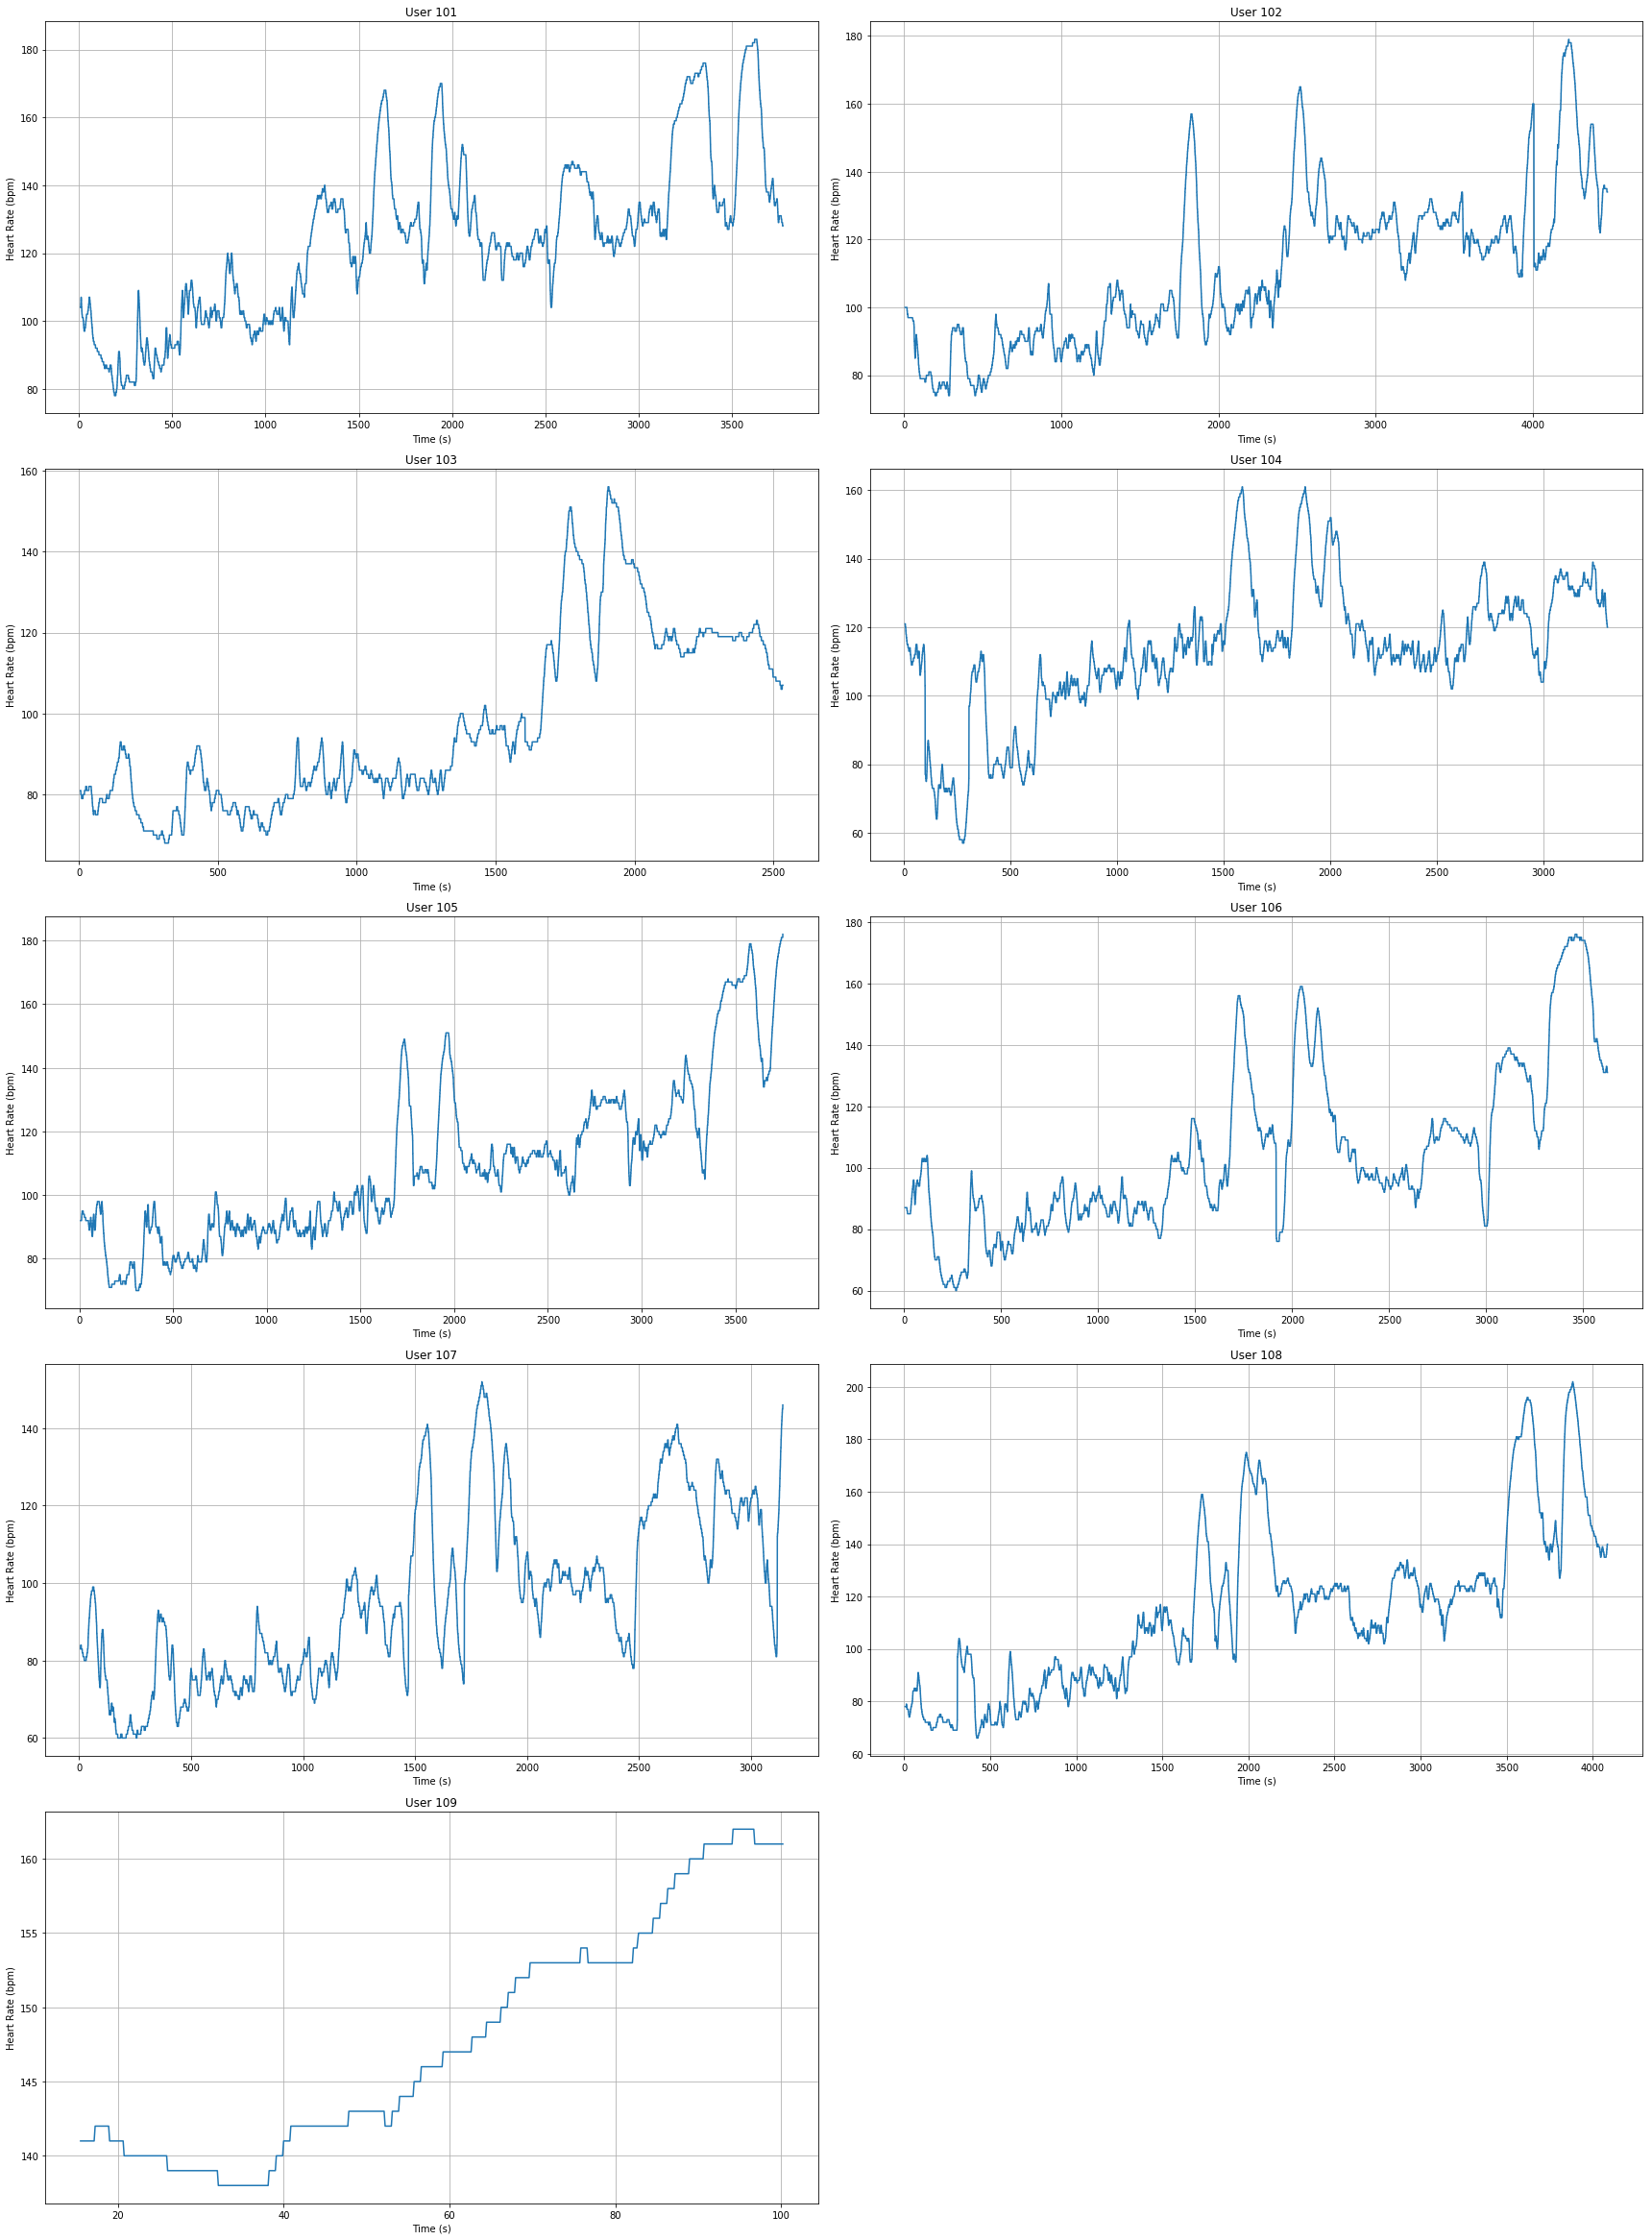

In [25]:
list_us.sort()
counter = 1
fig = plt.figure(figsize=(12*2,6.5*np.ceil(len(list_us)/2)))
for item in list_us:
    index = int(str(int(np.ceil(len(list_us)/2)))+'2'+str(counter))
    b = a[a['User ID']==item]
    ax = plt.subplot(index)
    ax.plot(b['Time (s)'],b['Heart Rate (bpm)'])
    ax.grid()
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Heart Rate (bpm)')
    ax.set_title('User '+str(item))
    counter += 1
fig.tight_layout()
plt.savefig('Figures/01_3-time_series_protocol_dataset.png',dpi=100,bbox_inches='tight')
plt.show()

In [26]:
c = df_op[['Time (s)','Heart Rate (bpm)','User ID']]
list_us = c['User ID'].unique()

for item in list_us:
    d = c[c['User ID']==item].interpolate()
    c.loc[c['User ID']==item,:] = d

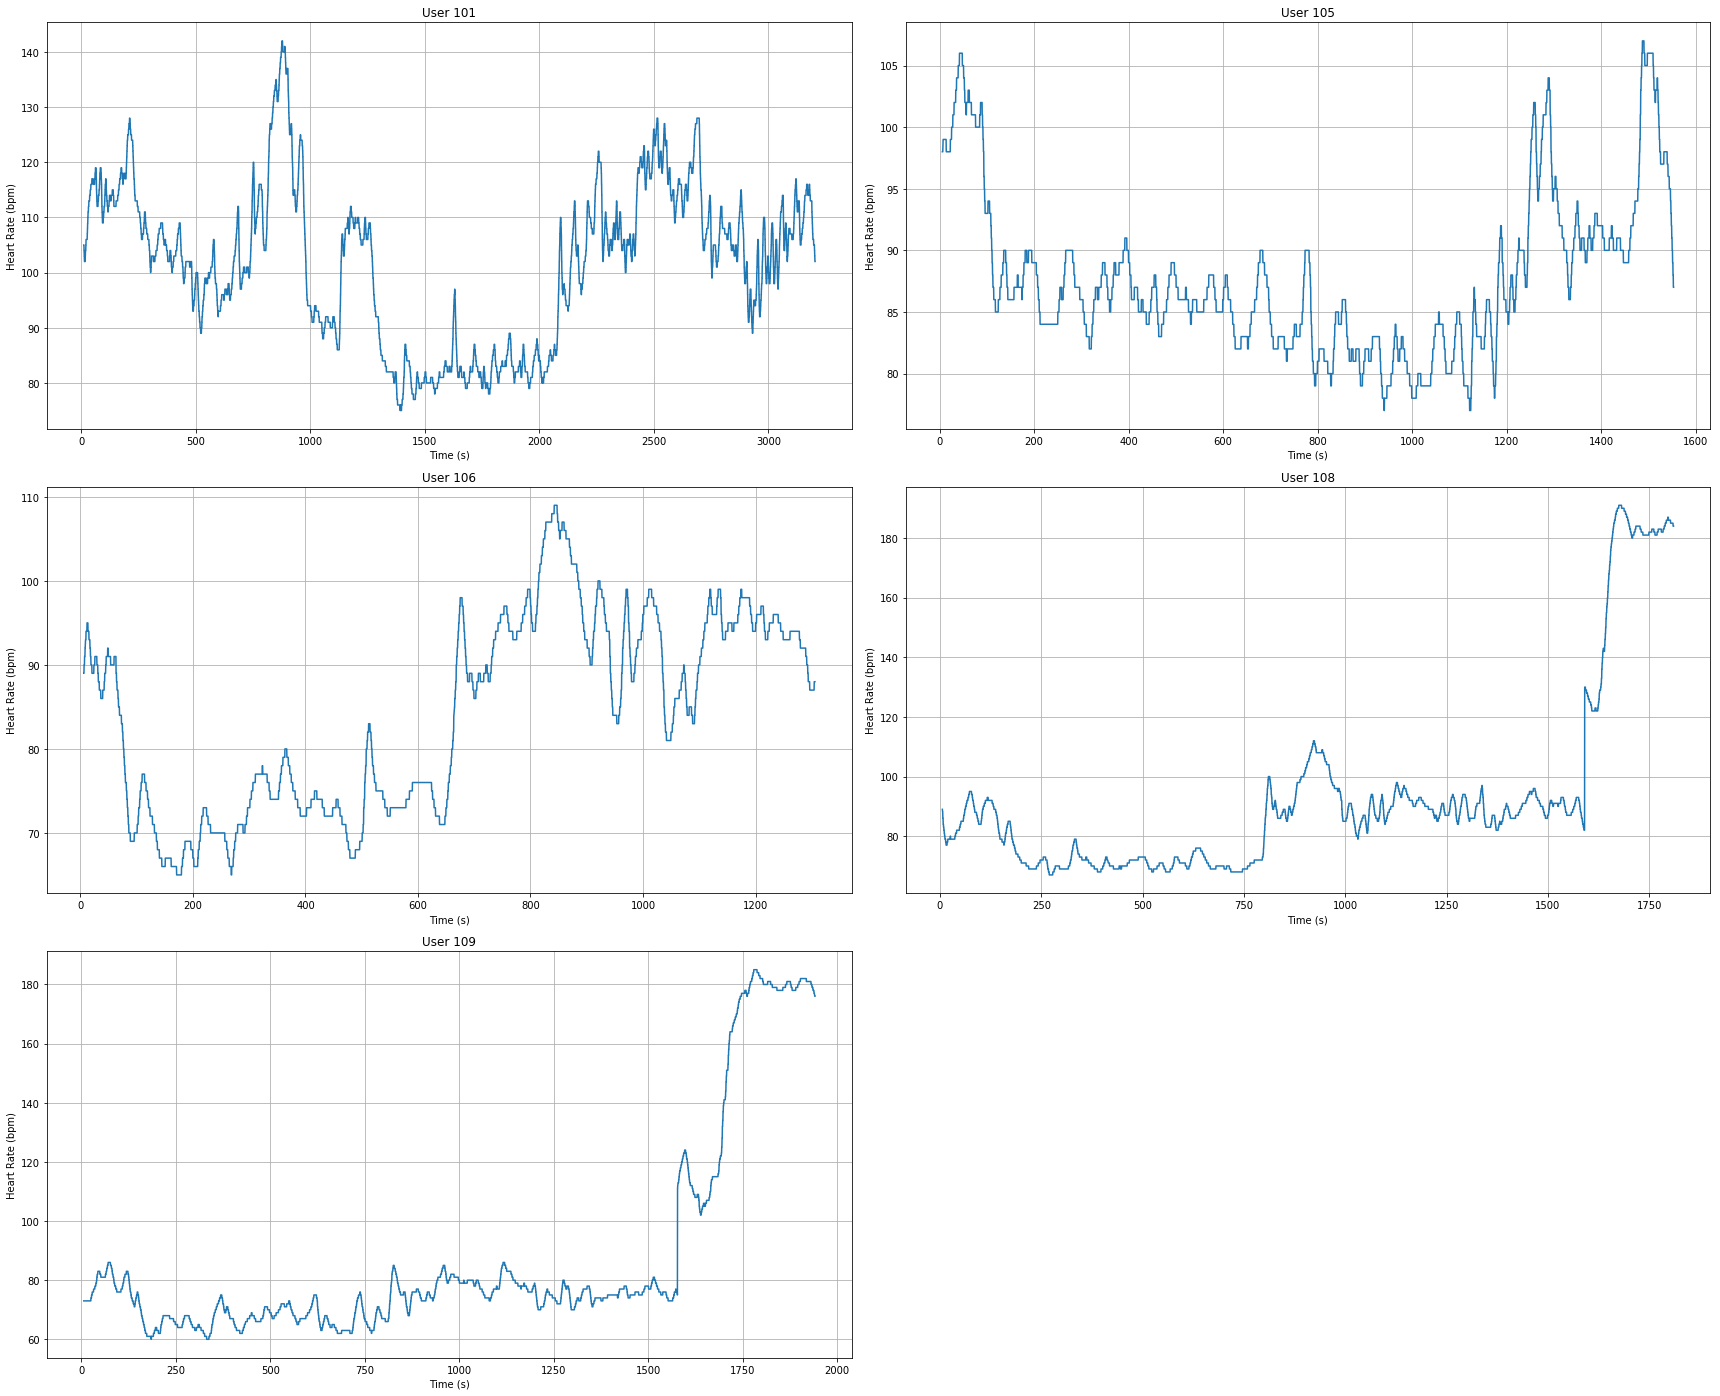

In [27]:
list_us.sort()
counter = 1
fig = plt.figure(figsize=(12*2,6.5*np.ceil(len(list_us)/2)))
for item in list_us:
    index = int(str(int(np.ceil(len(list_us)/2)))+'2'+str(counter))
    b = c[c['User ID']==item]
    ax = plt.subplot(index)
    ax.plot(b['Time (s)'],b['Heart Rate (bpm)'])
    ax.grid()
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Heart Rate (bpm)')
    ax.set_title('User '+str(item))
    counter += 1
fig.tight_layout()
plt.savefig('Figures/01_4-time_series_optional_dataset.png',dpi=100,bbox_inches='tight')
plt.show()

### After Time Variable is interpolated I proceed to drop rows with NaN values. It is supossed to obtain the 99% of the original rows once we have calculated we have less than 1% of rows with NaN values

In [28]:
df['Heart Rate (bpm)'] = a['Heart Rate (bpm)']
df_op['Heart Rate (bpm)'] = c['Heart Rate (bpm)'] 

Lets check that in `Heart Rate (bpm)` variable we have 0 or less than 1% rows with NaN values

In [29]:
print()
print('Protocol DF >> N NaN rows for Heart Rate: ',df['Heart Rate (bpm)'].isna().sum(),' | Total rows: ',len(df),' | % of NaN rows: ',round(df['Heart Rate (bpm)'].isna().sum()*100/len(df),4))
print('Protocol DF >> NaN rows: ',sum(conditional_1),' | Original rows: ',len(df),' | % of NaN rows: ',round(sum(conditional_1)*100/len(df),2))
print()
print('Optional DF >> N NaN rows for Heart Rate: ',df_op['Heart Rate (bpm)'].isna().sum(),' | Total rows: ',len(df_op),' | % of NaN rows: ',round(df_op['Heart Rate (bpm)'].isna().sum()*100/len(df_op),4))
print('Optional DF >> NaN rows: ',sum(conditional_2),' | Original rows: ',len(df_op),' | % of NaN rows: ',round(sum(conditional_2)*100/len(df_op),2))
print()


Protocol DF >> N NaN rows for Heart Rate:  46  | Total rows:  2872533  | % of NaN rows:  0.0016
Protocol DF >> NaN rows:  27665  | Original rows:  2872533  | % of NaN rows:  0.96

Optional DF >> N NaN rows for Heart Rate:  54  | Total rows:  977972  | % of NaN rows:  0.0055
Optional DF >> NaN rows:  3493  | Original rows:  977972  | % of NaN rows:  0.36



## NICE! Now lets drop NAN rows!

In [30]:
df_nona = df.dropna()
df_op_nona = df_op.dropna()

In [31]:
# Checking if we have droped many rows

In [32]:
print('PROTOCOL DF > Original N of registers: ',len(df),' > After droped the nan rows: ',len(df_nona),' > Rows droped: ',len(df)-len(df_nona),' and in % ',round((len(df)-len(df_nona))*100/len(df),2))
print('OPTIONAL DF > Original N of registers: ',len(df_op),' > After droped the nan rows: ',len(df_op_nona),' > Rows droped: ',len(df_op)-len(df_op_nona),' and in % ',round((len(df_op)-len(df_op_nona))*100/len(df_op),2))

PROTOCOL DF > Original N of registers:  2872533  > After droped the nan rows:  2844822  > Rows droped:  27711  and in %  0.96
OPTIONAL DF > Original N of registers:  977972  > After droped the nan rows:  974425  > Rows droped:  3547  and in %  0.36


### MORE DROPING 

Note: data labeled with activityID=0 should be discarded in any kind of analysis. This data mainly
covers transient activities between performing different activities, e.g. going from one location to the
next activity's location, or waiting for the preparation of some equipment. Also, different parts of one
subject's recording (in the case when the data collection was aborted for some reason) was put together
during these transient activities (noticeable by some “jumping” in the HR-data).

In [33]:
print('Protocol DF rows for activity 0: ',len(df_nona[df_nona['Activity ID']==0]),' > Total rows of the DF ',len(df_nona),' in % for bad data ',round(len(df_nona[df_nona['Activity ID']==0])*100/len(df_nona),2))
print('Optional DF rows for activity 0: ',len(df_op_nona[df_op_nona['Activity ID']==0]),' > Total rows of the DF ',len(df_op_nona),' in % for bad data',round((len(df_op_nona[df_op_nona['Activity ID']==0])*100/len(df_op_nona)),2))

Protocol DF rows for activity 0:  923391  > Total rows:  2844822  in %  32.46
Optional DF rows for activity 0:   > Total rows:  194846  > Total rows:  974425  in %  20.0


In [34]:
df_fin = df_nona[df_nona['Activity ID']!=0].copy()
df_op_fin = df_op_nona[df_op_nona['Activity ID']!=0].copy()

### And Finally lets concatenate OPTIONAL and PROTOCOL dataframes to retrieve the final dataframe to work with

In [35]:
del df
del df_nona
del df_op
del df_op_nona

In [36]:
df_f = pd.concat([df_fin,df_op_fin],axis=0)

In [37]:
df_f = df_f.reset_index(drop=True)

In [38]:
# FREE RAM SPACE
del df_fin
del df_op_fin

### Also we are going to drop USER ID Feature, is not longer needed for further analysis

In [39]:
df_f.drop('User ID',axis=1,inplace=True)

In [40]:
print(df_f.columns)
display(df_f.head())

Index(['Time (s)', 'Activity ID', 'Heart Rate (bpm)', 'Hand Temp (°C)',
       'Hand AX', 'Hand AY', 'Hand AZ', 'Hand AX2', 'Hand AY2', 'Hand AZ2',
       'Hand Giros1', 'Hand Giros2', 'Hand Giros3', 'Hand MX', 'Hand MY',
       'Hand MZ', 'Chest Temp (°C)', 'Chest AX', 'Chest AY', 'Chest AZ',
       'Chest AX2', 'Chest AY2', 'Chest AZ2', 'Chest Giros1', 'Chest Giros2',
       'Chest Giros3', 'Chest MX', 'Chest MY', 'Chest MZ', 'Ankle Temp (°C)',
       'Ankle AX', 'Ankle AY', 'Ankle AZ', 'Ankle AX2', 'Ankle AY2',
       'Ankle AZ2', 'Ankle Giros1', 'Ankle Giros2', 'Ankle Giros3', 'Ankle MX',
       'Ankle MY', 'Ankle MZ'],
      dtype='object')


,Time (s),Activity ID,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand AX2,Hand AY2,Hand AZ2,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Chest Temp (°C),Chest AX,Chest AY,Chest AZ,Chest AX2,Chest AY2,Chest AZ2,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Chest MZ,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle AX2,Ankle AY2,Ankle AZ2,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


___

## Checking correlations of Features

In [41]:
k = abs(df_f.corr())
# I filter the data to display only correlations over 0.65 which I stimate as high correlation between Features
k = k[k>0.6]

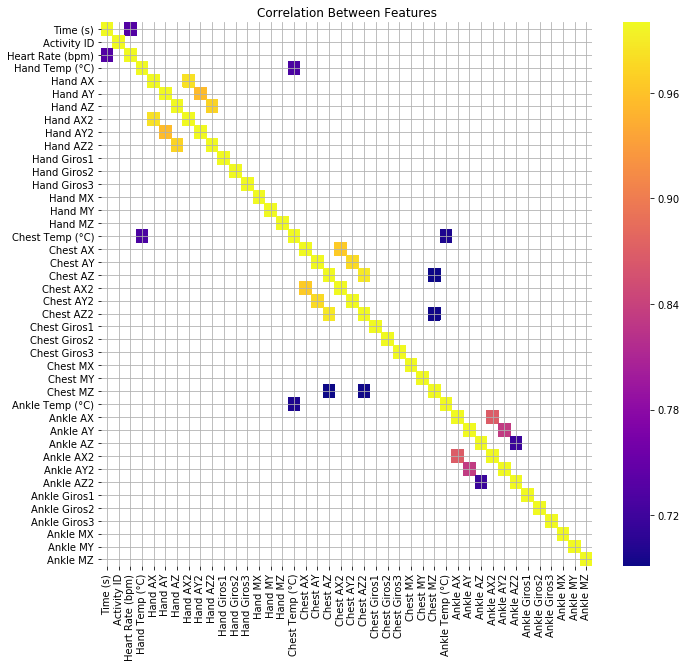

In [42]:
plt.figure(figsize=(11,10))

sns.heatmap(k,cmap=plt.cm.plasma)
plt.grid()
plt.title('Correlation Between Features')

plt.savefig('Figures/01_5-corr_before_feature_removal.png',dpi=100,bbox_inches='tight')
plt.show()

In [43]:
# I have observed that we have correlation between hand and chest temperature. ALso I observe that all acceletartion sensors
# have a high collinearity with the second pair of sensors for each part of the body. Acceleration sensors indexed as 1 (or wihout index)
# are correlated with the sensors indexed as 2. But just with the sensors of he same body place.
# I also have collinearity between Time and Heart Rate Features, between Chest Temp, Hand Temp and Ankle Temp, between Chest magnetic Z axis 
# (Chest MZ), Chest acceleration Z axis sensors 1 and 2 (Chest AZ/AZ2)

### NEXT STEP CONSISTS ON DROPING ALL THESE COLUMNS TO AVOID PROBLEMS WHEN WE APPLY ML MODELS

In [44]:
columns_to_delete = ['Time (s)','Chest Temp (°C)','Chest MZ']+[item for item in df_f.columns if 'AX2' in item or 'AY2' in item or 'AZ2' in item]
print('Features to Drop:')
print(columns_to_delete)

Features to Drop:
['Time (s)', 'Chest Temp (°C)', 'Chest MZ', 'Hand AX2', 'Hand AY2', 'Hand AZ2', 'Chest AX2', 'Chest AY2', 'Chest AZ2', 'Ankle AX2', 'Ankle AY2', 'Ankle AZ2']


In [45]:
data = df_f.drop(columns_to_delete,axis=1)
print('Number of columns droped: ',len(columns_to_delete))
print('Final number of columns: ',len(data.columns))
print('Final number of rows: ',len(data))
display(data.head())

Number of columns droped:  12
Final number of columns:  30
Final number of rows:  2701010


,Activity ID,Heart Rate (bpm),Hand Temp (°C),Hand AX,Hand AY,Hand AZ,Hand Giros1,Hand Giros2,Hand Giros3,Hand MX,Hand MY,Hand MZ,Chest AX,Chest AY,Chest AZ,Chest Giros1,Chest Giros2,Chest Giros3,Chest MX,Chest MY,Ankle Temp (°C),Ankle AX,Ankle AY,Ankle AZ,Ankle Giros1,Ankle Giros2,Ankle Giros3,Ankle MX,Ankle MY,Ankle MZ
0,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,0.124482,9.65003,-1.65181,0.036668,0.016559,-0.052791,0.567566,-50.7269,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
1,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,0.200711,9.64980,-1.65043,0.019343,-0.024304,-0.059843,0.904990,-50.5080,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,0.270277,9.72331,-1.88174,-0.001428,0.038466,-0.046464,0.455480,-50.7209,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
3,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,0.236737,9.72447,-1.72746,0.017277,-0.048547,-0.074946,0.324284,-50.1544,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
4,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


### Let's check the correlations again

In [46]:
k_d = data.corr()
# I filter the data to display only correlations over 0.65 which I stimate as high correlation between Features
#k_d = k_d[k_d>0.6]

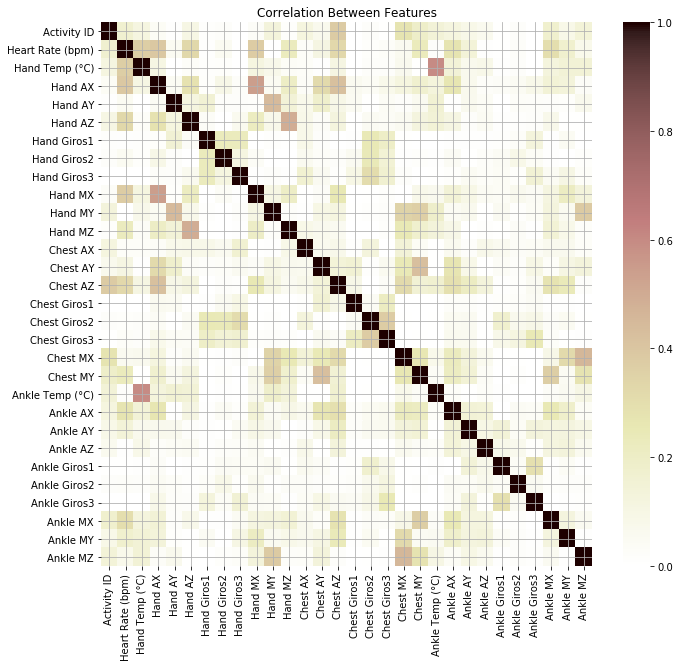

In [47]:
plt.figure(figsize=(11,10))

sns.heatmap(abs(k_d),cmap=plt.cm.pink_r)
plt.grid()
plt.title('Correlation Between Features')
plt.savefig('Figures/01_6-corr_after_feature_removal.png',dpi=100,bbox_inches='tight')
plt.show()

# Perfect! I have managed to delete Features with high correlation

### Now I proceed to delete the older dataframe to save RAM space

In [48]:
del df_f

# Lets save the data to HDF5 format

In [49]:
data.to_pickle('physical_activity.pkl')

In [50]:
# Deleting the data dataframe
del data

___